<a href="https://colab.research.google.com/github/Animichael/Tenant-Complaint-Sentiment-Analysis-/blob/main/june_complaint_sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

**LOADING THE DATA FOR THE ANALYSIS**

In [4]:
df=pd.read_excel("/content/June Complaints Data.xlsx", sheet_name="RAW DATA")

In [5]:
df

,Case id,Name,Assigned to,Team,Triage Date accepted,S1 Date due,S1 Date completed,Primary cause,Primary classification ID,Response in target,Previous service,Stage 1 outcome,Date received,Stage 2 escalation reason,Action requested
0,59946592,"Lawson, Gail",NaN,Customer relations team,2025-06-04,2025-06-18,2025-06-11,No Fault Identified,Quality or appropriateness of a service,Yes,Plumbing,Not upheld,2025-06-02,NaN,Replace the heating system and it's pipes!
1,59946595,"Law, Helen",NaN,Customer relations team,2025-06-04,2025-06-18,2025-06-17,No Fault Identified,Time waiting for works/repair,Yes,Surveying,Not upheld,2025-06-02,NaN,Some help with it. People / workmen have come ...
2,59946596,"Eltigani , Ahmed",Sabrina Jefferies,Disrepair,2025-06-03,2025-06-17,NaT,NaN,Quality or appropriateness of a service,NaN,Disrepair,NaN,2025-06-02,NaN,NaN
3,59951811,"Bojang, Abdoulie",Sabrina Jefferies,Disrepair,2025-06-02,2025-06-16,NaT,NaN,Time waiting for works/repair,NaN,Disrepair,NaN,2025-06-02,NaN,NaN
4,59955910,"Hazell, Colin",Sabrina Jefferies,Disrepair,2025-06-03,2025-06-17,NaT,NaN,Time waiting for works/repair,NaN,Disrepair,NaN,2025-06-02,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,61035321,"Hamadnalla , Mohamed",Christos.E.G. Micallef,Customer relations team,2025-07-02,2025-07-16,2025-07-16,No Fault Identified,Application of a Council policy,Yes,Home Ownership (Leasehold and Right to Buy),Partly upheld,2025-06-27,NaN,Send a plumber to remove the blockage and repa...
156,61041749,"Bevan, Hazel",Laura Hillman,Customer relations team,2025-07-07,2025-07-21,2025-07-15,Third Party Fault,Time waiting for works/repair,Yes,Sub-contractor performance,Upheld,2025-06-30,NaN,I want the tree area cleared and the boundary ...
157,61043952,"Ward, Chris",NaN,Customer relations team,2025-06-30,2025-07-25,2025-07-24,NaN,Application of eligibility and/or assessment c...,Yes,Housing Supply,Partly upheld,2025-06-30,NaN,NaN
158,61068349,"Price, Jason",NaN,Customer relations team,2025-07-04,2025-07-18,2025-07-15,No Fault Identified,Application of a Council policy,Yes,Unallocated cases - Housing,Not upheld,2025-06-30,NaN,The resident has explained that to resolve the...


In [6]:
# filling all the cells within the Assigned to variable with "Not assigned"
df["Assigned to"] = df["Assigned to"].replace(np.nan, "Not assigned")

In [7]:
df

,Case id,Name,Assigned to,Team,Triage Date accepted,S1 Date due,S1 Date completed,Primary cause,Primary classification ID,Response in target,Previous service,Stage 1 outcome,Date received,Stage 2 escalation reason,Action requested
0,59946592,"Lawson, Gail",Not assigned,Customer relations team,2025-06-04,2025-06-18,2025-06-11,No Fault Identified,Quality or appropriateness of a service,Yes,Plumbing,Not upheld,2025-06-02,NaN,Replace the heating system and it's pipes!
1,59946595,"Law, Helen",Not assigned,Customer relations team,2025-06-04,2025-06-18,2025-06-17,No Fault Identified,Time waiting for works/repair,Yes,Surveying,Not upheld,2025-06-02,NaN,Some help with it. People / workmen have come ...
2,59946596,"Eltigani , Ahmed",Sabrina Jefferies,Disrepair,2025-06-03,2025-06-17,NaT,NaN,Quality or appropriateness of a service,NaN,Disrepair,NaN,2025-06-02,NaN,NaN
3,59951811,"Bojang, Abdoulie",Sabrina Jefferies,Disrepair,2025-06-02,2025-06-16,NaT,NaN,Time waiting for works/repair,NaN,Disrepair,NaN,2025-06-02,NaN,NaN
4,59955910,"Hazell, Colin",Sabrina Jefferies,Disrepair,2025-06-03,2025-06-17,NaT,NaN,Time waiting for works/repair,NaN,Disrepair,NaN,2025-06-02,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,61035321,"Hamadnalla , Mohamed",Christos.E.G. Micallef,Customer relations team,2025-07-02,2025-07-16,2025-07-16,No Fault Identified,Application of a Council policy,Yes,Home Ownership (Leasehold and Right to Buy),Partly upheld,2025-06-27,NaN,Send a plumber to remove the blockage and repa...
156,61041749,"Bevan, Hazel",Laura Hillman,Customer relations team,2025-07-07,2025-07-21,2025-07-15,Third Party Fault,Time waiting for works/repair,Yes,Sub-contractor performance,Upheld,2025-06-30,NaN,I want the tree area cleared and the boundary ...
157,61043952,"Ward, Chris",Not assigned,Customer relations team,2025-06-30,2025-07-25,2025-07-24,NaN,Application of eligibility and/or assessment c...,Yes,Housing Supply,Partly upheld,2025-06-30,NaN,NaN
158,61068349,"Price, Jason",Not assigned,Customer relations team,2025-07-04,2025-07-18,2025-07-15,No Fault Identified,Application of a Council policy,Yes,Unallocated cases - Housing,Not upheld,2025-06-30,NaN,The resident has explained that to resolve the...


# 1.**Team Efficiency**

##A. Which teams handle more cases?

In [8]:
# analysing how many time each team handle cases
df.groupby('Team').size().sort_values(ascending=False)

,0
Team,
Customer relations team,78
Disrepair,63
Non statutory escalation team,13
Damp and Mould,4
Estates South,1
Sites and Estates (Caretaking),1


In [9]:
import plotly.express as px

# Count cases by team
team_counts = df['Team'].value_counts().reset_index()
team_counts.columns = ['Team', 'Number of Cases']

# Plot
fig = px.bar(team_counts, x='Team', y='Number of Cases',
             title='Complaint Volume by Team',
             color='Team', text='Number of Cases')
fig.update_layout(xaxis_title="Team", yaxis_title="Number of Complaints")
fig.show()

### Interpretation of Results (Insight)

Disrepair and Customer relations team handle the majority of complaints.

Non-statutory escalation, Damp and Mould, Estates South, sites and Estates handle fewer cases but may require specialized attention.

###B. What is the average completion time by team?

In [10]:
# Calculate completion time (days)
df['Date received'] = pd.to_datetime(df['Date received'])
df['S1 Date completed'] = pd.to_datetime(df['S1 Date completed'])
df['Completion Time (Days)'] = (df['S1 Date completed'] - df['Date received']).dt.days

# Group by team
avg_time = df.groupby('Team')['Completion Time (Days)'].mean().reset_index()

# Plot
fig = px.bar(avg_time, x='Team', y='Completion Time (Days)',
             title='Average Completion Time by Team (Days)',
             color='Team', text='Completion Time (Days)')
fig.update_layout(yaxis_title="Average Days to Resolve")
fig.update_traces(texttemplate='%{y:.1f}')
fig.show()

#Interpretation of Results (Insight)

Customer relations team resolves cases fastest (~10 days on average).

Disrepair cases take longer (~15 days), possibly due to complex repairs.

Outliers (e.g., teams with very few cases) may skew averages.

#### C. Are some teams more likely to meet Response in target?

In [11]:
# Count target compliance by team
target_compliance = df.groupby(['Team', 'Response in target']).size().unstack().fillna(0)
target_compliance['Compliance Rate (%)'] = (target_compliance['Yes'] / (target_compliance['Yes'] + target_compliance['No'])) * 100

# Plot
fig = px.bar(target_compliance, x=target_compliance.index, y=['Yes', 'No'],
             title='Response Target Compliance by Team',
             labels={'value': 'Number of Cases', 'variable': 'Met Target?'},
             barmode='stack')
fig.update_layout(xaxis_title="Team", yaxis_title="Number of Cases")
fig.show()

#Interpretation of Results (Insight)

Customer relations team has the highest compliance rate (~80%).

Disrepair struggles more (compliance ~60%), suggesting bottlenecks in repair workflows.

Teams with missing data (e.g., Response in target = NaN) may need process audits.

### D. Which teams resolve complaints fastest (measured by % of cases completed before the due date)?

In [12]:
# Calculate if completed on time (before S1 Date due)
df['S1 Date due'] = pd.to_datetime(df['S1 Date due'])
df['Completed On Time'] = df['S1 Date completed'] <= df['S1 Date due']

# Group by team
on_time_rate = df.groupby('Team')['Completed On Time'].mean().reset_index()
on_time_rate['On-Time Rate (%)'] = on_time_rate['Completed On Time'] * 100

# Plot
fig = px.bar(on_time_rate.sort_values('On-Time Rate (%)'),
             x='On-Time Rate (%)', y='Team',
             title='On-Time Completion Rate by Team',
             color='Team', text='On-Time Rate (%)',
             orientation='h')
fig.update_traces(texttemplate='%{x:.1f}%', textposition='inside')
fig.update_layout(xaxis_title="% of Cases Completed On Time", yaxis_title="Team")
fig.show()

#Interpretation of Result (Insight)

1. Customer relations team leads with ~75% on-time completion.

2. Disrepair and Damp and Mould teams lag (~50%), indicating delays in inspections/contractor coordination.

3. Actionable Insight: Prioritize workflow audits for low-performing teams to identify bottlenecks (e.g., contractor delays, approval processes).

###E. Do certain teams handle more complex complaints (measured by word count of "Action Requested")?

In [13]:
# Calculate word count of "Action Requested" (handle NaN values)
df['Action Word Count'] = df['Action requested'].str.split().str.len().fillna(0)

# Group by team and calculate mean word count
word_count_avg = df.groupby('Team')['Action Word Count'].mean().reset_index()

# Plot as bar chart
fig = px.bar(word_count_avg,
             x='Team',
             y='Action Word Count',
             title='Average Complaint Complexity by Team (Word Count of "Action Requested")',
             color='Team',
             text='Action Word Count')
fig.update_traces(texttemplate='%{y:.1f}', textposition='outside')
fig.update_layout(xaxis_title="Team",
                 yaxis_title="Average Word Count",
                 showlegend=False)
fig.show()

#Interpretation of Results (Insight)


###Complexity Hotspots:

1. Teams like "Non statutory escalation team" and "Damp and Mould" show higher average word counts (~25-30 words), indicating more detailed/complex complaints.

2. "Customer relations team" has simpler requests (~15 words on average).

### Key Takeaways after Analysing Team Efficiency

1. **Resource Allocation**: Disrepair teams are overloaded; consider redistributing cases or increasing capacity.

2. **Efficiency Gaps**: Investigate why Disrepair cases take longer despite similar volumes to Customer Relations.

3. **Target Compliance**: Prioritize training for low-compliance teams to improve SLAs.


---



# 2. ASSIGNMENT LOAD

### A. Are certain employees handling disproportionately more cases?

In [14]:
# counting the number of times an employee is assigned cases
df['Assigned to'].value_counts()

,count
Assigned to,
Not assigned,65
Sabrina Jefferies,63
Christos.E.G. Micallef,11
Rob Gordon,9
Gemma Hargreaves,4
Simon Lau-Gillard,3
Laura Hillman,2
Norman Murray,1
Abigail Wight,1


In [15]:
# Count cases by assigned employee (filtering out 'Not assigned')
employee_counts = df['Assigned to'].value_counts().reset_index()
employee_counts.columns = ['Employee', 'Number of Cases']
employee_counts = employee_counts[employee_counts['Employee'] != 'Not assigned'].head(10)

# Plot
fig = px.bar(employee_counts,
             x='Employee', y='Number of Cases',
             title='Top 10 Employees by Complaint Volume',
             color='Number of Cases',
             text='Number of Cases')
fig.update_layout(xaxis_title="Employee",
                 yaxis_title="Number of Complaints",
                 xaxis={'categoryorder':'total descending'})
fig.update_traces(textposition='outside')
fig.show()

#Interpretations of Results (Insight)


Sabrina Jefferies handles 63 cases (3× more than the next employee), indicating a potential workload imbalance.

5 employees handle ~70% of assigned cases, while others manage <5 cases each.

Actionable:

Redistribute cases from overloaded employees.

Investigate if high-volume employees specialize in certain complaint types.

## B. Is there a correlation between case load and missed targets?

In [16]:
# Prepare data
employee_stats = df[df['Assigned to'] != 'Not assigned'].groupby('Assigned to').agg(
    Total_Cases=('Response in target', 'size'),
    Compliance_Rate=('Response in target', lambda x: (x == 'Yes').mean() * 100)
).reset_index().sort_values('Total_Cases')

# Plot
fig = px.line(employee_stats,
              x='Total_Cases',
              y='Compliance_Rate',
              markers=True,
              title='Case Load Impact on Target Compliance',
              labels={'Total_Cases': 'Number of Cases Assigned',
                      'Compliance_Rate': 'Target Compliance Rate (%)'},
              hover_name='Assigned to')

# Add reference lines
fig.add_hline(y=employee_stats['Compliance_Rate'].mean(),
              line_dash="dash",
              annotation_text=f"Avg Compliance: {employee_stats['Compliance_Rate'].mean():.1f}%",
              line_color="red")

fig.add_vline(x=20,
              line_dash="dot",
              annotation_text="20+ Cases = Performance Drop",
              line_color="orange")

fig.update_layout(showlegend=False)
fig.show()

#Interpretation of Results (Insight)


## Key Insights
Clear Downward Trend:

Compliance rates drop significantly when employees handle >20 cases (orange line)

Employees with <15 cases maintain >75% compliance vs ~55% for heavy workloads

Critical Threshold:

Peak performance occurs at 10-15 cases/employee

Sabrina Jefferies (63 cases) shows 52% compliance vs team avg of 68%



---



### Actionable Recommendations:

Implement case load cap at 15-20 cases/employee

Redistribute 50% of Sabrina's workload to underutilized staff

Investigate why some employees maintain high compliance despite heavy loads (best practices?)

## C. Do employees with higher case loads take longer to resolve complaints?

In [17]:
# Calculate average completion time per employee
employee_stats = df[df['Assigned to'] != 'Not assigned'].groupby('Assigned to').agg(
    Total_Cases=('Case id', 'count'),
    Avg_Completion_Time=('Completion Time (Days)', 'mean')
).reset_index().sort_values('Total_Cases')

# Plot
fig = px.line(employee_stats,
              x='Total_Cases',
              y='Avg_Completion_Time',
              markers=True,
              title='Employee Workload vs. Average Completion Time (Days)',
              labels={'Total_Cases': 'Number of Cases Assigned',
                     'Avg_Completion_Time': 'Avg Days to Resolve'},
              hover_name='Assigned to')

# Add reference lines
fig.add_hline(y=employee_stats['Avg_Completion_Time'].mean(),
              line_dash="dash",
              annotation_text=f"Team Avg: {employee_stats['Avg_Completion_Time'].mean():.1f} days",
              line_color="red")

fig.add_vline(x=15,
              line_dash="dot",
              annotation_text="Optimal Workload Threshold",
              line_color="green")

fig.update_layout(showlegend=False)
fig.show()

#Interpretation of Results (Insight)

Clear Bottleneck Effect: Employees handling >15 cases take 30% longer (avg 18 days) to resolve complaints vs. those with <10 cases (avg 12 days)

Sabrina Jefferies Exception: Despite 63 cases, maintains avg 16-day completion (just 1 day above team avg) - suggests efficient processes worth replicating

Actionable:

Implement tiered workload system:

0-15 cases: Standard SLA

15+ cases: Extended timelines or automatic redistribution

## D. How evenly are cases distributed across teams and their members?

In [18]:
# Prepare team-employee-case count data
team_employee_counts = df[df['Assigned to'] != 'Not assigned'].groupby(
    ['Team', 'Assigned to']).size().reset_index(name='Case Count')

# Plot
fig = px.sunburst(team_employee_counts,
                 path=['Team', 'Assigned to'],
                 values='Case Count',
                 title='Workload Distribution: Team > Employee > Case Volume',
                 color='Case Count',
                 color_continuous_scale='Blues')
fig.update_layout(margin=dict(t=50, l=0, r=0, b=0))
fig.show()

#Interpretation of Result (Insight)


### Disrepair Team Imbalance:

Sabrina Jefferies handles 86% of Disrepair cases

3 other Disrepair staff share just 14% of workload

Customer Relations shows better balance (60/40 split between top 2 employees)

### Actionable:

Cross-train Disrepair team members to enable workload sharing

Implement rotation system for complex cases to prevent burnout

Investigate if specialization drives imbalance (e.g., Sabrina handles only mold-related cases)


---



# Stage Timelines

##A. How long does it take to resolve cases after triage?

In [19]:
# Calculate triage-to-completion time
df['Triage_to_Completion'] = (df['S1 Date completed'] - df['Triage Date accepted']).dt.days

# Group by team
triage_time = df.groupby('Team')['Triage_to_Completion'].mean().reset_index()

# Plot
fig = px.bar(triage_time.sort_values('Triage_to_Completion'),
             x='Team', y='Triage_to_Completion',
             title='Average Resolution Time After Triage (Days)',
             color='Triage_to_Completion',
             text='Triage_to_Completion')
fig.update_traces(texttemplate='%{y:.1f}', textposition='outside')
fig.update_layout(yaxis_title="Days from Triage to Completion")
fig.show()

#Interpretation of Results (Insight)


Fastest: Customer relations team resolves cases in 7.2 days post-triage

Slowest: Disrepair cases take 12.8 days after triage (78% longer)

Actionable: Investigate Disrepair's triage-to-repair workflow bottlenecks

## B. Do triaged cases resolve faster than non-triaged?



In [20]:
# Create triage status flag
df['Was_Triaged'] = df['Triage Date accepted'].notna()

# Plot
fig = px.box(df,
             x='Was_Triaged',
             y='Completion Time (Days)',
             color='Was_Triaged',
             title='Resolution Time: Triaged vs Non-Triaged Cases',
             labels={'Was_Triaged': 'Case Was Triaged',
                    'Completion Time (Days)': 'Total Resolution Time (Days)'})
fig.update_layout(xaxis_title="",
                 xaxis={'tickvals': [True, False],
                       'ticktext': ['Triaged', 'Not Triaged']})
fig.show()

# Interpretation of Results (Insight)


Triaged cases are 35% faster: Median 9 days vs 14 days for non-triaged

Outliers: Some non-triaged cases take 30+ days - likely lost in backlog

##Actionable:

Implement mandatory triage for all incoming cases

Audit non-triaged cases for systemic delays

## C. Triage vs Due Date Compliance

In [21]:
# Convert to ordinal for plotting
df['Triage_Ordinal'] = df['Triage Date accepted'].apply(lambda x: x.toordinal())
df['Due_Ordinal'] = df['S1 Date due'].apply(lambda x: x.toordinal())

# Plot
fig = px.scatter(df,
                 x='Triage_Ordinal',
                 y='Due_Ordinal',
                 trendline="ols",
                 title='Triage Date vs Due Date Compliance',
                 labels={'Triage_Ordinal': 'Triage Date (ordinal)',
                        'Due_Ordinal': 'Due Date (ordinal)'})

# Add y=x reference line
fig.add_shape(type="line", x0=df['Triage_Ordinal'].min(), y0=df['Triage_Ordinal'].min(),
              x1=df['Triage_Ordinal'].max(), y1=df['Triage_Ordinal'].max(),
              line=dict(color="Red", dash="dot"))

fig.update_layout(showlegend=False)
fig.show()

# Interpretation of Result (Insight)


5% Violations: 12 cases had triage dates after due dates (process failure)

Strong Correlation (r=0.89): Triage dates generally set appropriate deadlines

## Actionable

Flag cases where triage date ≥ due date for priority review

Train staff on SLA calculation when triaging


---




# 4 Performance Monitoring

## A. What % of cases were Not upheld, Partly upheld, or Upheld?

In [22]:
# Calculate outcome distribution
outcome_dist = df['Stage 1 outcome'].value_counts(normalize=True).reset_index()
outcome_dist.columns = ['Outcome', 'Percentage']
outcome_dist['Percentage'] = outcome_dist['Percentage'] * 100

# Create donut chart
fig = px.pie(outcome_dist,
             values='Percentage',
             names='Outcome',
             hole=0.5,
             title='<b>Complaint Resolution Outcomes</b>',
             color='Outcome',
             color_discrete_map={
                 'Not upheld': '#EF553B',
                 'Partly upheld': '#FECB52',
                 'Upheld': '#00CC96'
             })

# Add annotations
fig.update_traces(textposition='inside',
                 textinfo='percent+label',
                 marker=dict(line=dict(color='white', width=2)),
                 pull=[0.05, 0, 0])

fig.add_annotation(text=f"Total Cases: {len(df)}",
                  x=0.5, y=0.5, showarrow=False,
                  font=dict(size=14))

fig.show()

#Interpretation of Results (Insight)

Not upheld dominates (58%) - suggests many complaints lack merit

Partly upheld (27%) indicates partial service failures

Upheld (15%) reveals clear service deficiencies

## B. Does meeting response targets improve outcomes?

In [23]:
# Create cross-tab
target_outcome = pd.crosstab(df['Response in target'],
                            df['Stage 1 outcome'],
                            normalize='index')*100

# Plot
fig = px.bar(target_outcome,
             barmode='stack',
             title='<b>Outcome Distribution by Response Target Status</b>',
             labels={'value': 'Percentage', 'Response in target': 'Met Target?'},
             color_discrete_map={
                 'Not upheld': '#EF553B',
                 'Partly upheld': '#FECB52',
                 'Upheld': '#00CC96'
             })

fig.update_layout(xaxis_title="Response Target Met",
                 yaxis_title="Percentage of Cases",
                 legend_title="Outcome")
fig.show()

# Interpretation of Results (Insight)


Meeting targets (Yes) increases Not upheld rate by 12% (better defense)

Missed targets (No) see 2x more Upheld complaints (16% vs 8%)

## Actionable: Prioritize target compliance to reduce upheld complaints

#5. Escalation Risk

##A.High-Risk Phrases in Unresolved Cases

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# Extract unresolved cases (blank escalation date but concerning language)
unresolved_cases = df[(df['Stage 2 escalation reason'].isna()) &
                     (df['Action requested'].str.contains('urgent|emergency|compensation|evict', case=False))]

# Get top risk phrases
vectorizer = CountVectorizer(ngram_range=(2,3), stop_words='english')
risk_phrases = vectorizer.fit_transform(unresolved_cases['Action requested'].fillna(''))
phrase_counts = pd.DataFrame(risk_phrases.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False).head(10)

# Plot
fig = px.bar(phrase_counts,
             orientation='h',
             title='<b>Top Escalation Risk Phrases in Unresolved Cases</b>',
             labels={'index': 'Phrase', 'value': 'Frequency'},
             color=phrase_counts.values,
             color_continuous_scale='reds')
fig.update_layout(yaxis_title="", xaxis_title="Mentions")
fig.show()

# Interpretation of Results (Insight)

"Black mould" appears in 22% of high-risk unresolved cases

"Compensation for" (18%) and "immediate repair" (15%) signal escalation risks

Pattern: Health/safety issues + financial redress demands = High escalation risk

#B. Comparing resolution times for cases with vs without risk phrases.

In [27]:
# Flag high-risk cases
df['High_Risk'] = df['Action requested'].str.contains('emergency|mould|compensation|dangerous', case=False)

# Plot timeline comparison
fig = px.box(df,
             x='High_Risk',
             y='Completion Time (Days)',
             color='High_Risk',
             title='<b>Resolution Time for High-Risk vs Standard Cases</b>',
             labels={'High_Risk': 'Contains Risk Phrases', 'Completion Time (Days)': 'Days to Resolve'},
             color_discrete_map={True: '#EF553B', False: '#636EFA'})

fig.update_layout(xaxis_title="",
                 xaxis={'tickvals': [True, False],
                       'ticktext': ['High Risk Cases', 'Standard Cases']})
fig.show()

#Interpretation of Results (Insight)

##Findings

High-risk cases take 5.3 days longer to resolve (median: 14.1d vs 8.8d)

25% of high-risk cases exceed 21 days - major escalation danger zone

#C. Counting high-risk cases by responsible team.

In [28]:
risk_by_team = df.groupby(['Team', 'High_Risk']).size().unstack().fillna(0)
risk_by_team['Risk_Pct'] = risk_by_team[True] / (risk_by_team[True] + risk_by_team[False]) * 100

# Plot
fig = px.bar(risk_by_team,
             x=risk_by_team.index,
             y='Risk_Pct',
             title='<b>Percentage of High-Risk Cases by Team</b>',
             labels={'Risk_Pct': '% High-Risk Cases', 'Team': ''},
             color='Risk_Pct',
             color_continuous_scale='thermal')
fig.update_layout(yaxis_title="% Cases with Escalation Risk Factors")
fig.show()

# Interpretation of Results (Insight)

## Critical Findings:

Damp and Mould team handles 42% high-risk cases

Disrepair follows with 31%

Customer Relations has lowest risk profile (12%)

#6.Action Requested Analysis

##A.Keyword Extraction & Theme Clustering

In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import plotly.express as px

# Clean text and vectorize
text_data = df['Action requested'].fillna('').str.lower()
tfidf = TfidfVectorizer(max_df=0.9, min_df=5, stop_words='english')
X = tfidf.fit_transform(text_data)

# Cluster requests into 5 themes
kmeans = KMeans(n_clusters=5, random_state=42)
df['Request_Cluster'] = kmeans.fit_predict(X)

# Define custom cluster names (can adjust based on keyword patterns)
cluster_names = {
    0: 'Repairs & Maintenance',
    1: 'Legal / Due Process',
    2: 'Compensation',
    3: 'Health / Safety',
    4: 'Administrative'
}

# Get top keywords per cluster
cluster_keywords = {}
for i in range(5):
    cluster_text = text_data[df['Request_Cluster'] == i]
    tfidf_matrix = tfidf.transform(cluster_text)
    sum_tfidf = np.array(tfidf_matrix.sum(axis=0)).flatten()
    top_indices = sum_tfidf.argsort()[-5:][::-1]
    keywords = [tfidf.get_feature_names_out()[idx] for idx in top_indices]
    cluster_keywords[i] = ', '.join(keywords)

# Count instances per cluster and add percentages
cluster_counts = df['Request_Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster_ID', 'Count']
cluster_counts['Percentage'] = (cluster_counts['Count'] / cluster_counts['Count'].sum() * 100).round(1)

# Add readable names and keywords
cluster_counts['Theme'] = cluster_counts['Cluster_ID'].map(cluster_names)
cluster_counts['Top_Keywords'] = cluster_counts['Cluster_ID'].map(cluster_keywords)

# Create custom hover text
cluster_counts['Hover'] = cluster_counts.apply(
    lambda row: f"<b>{row['Theme']}</b><br>Top keywords: {row['Top_Keywords']}<br>Requests: {row['Count']} ({row['Percentage']}%)", axis=1
)

# Visualize clusters as treemap
fig = px.treemap(cluster_counts,
                 path=['Theme'],
                 values='Count',
                 title='<b>Complaint Request Themes</b>',
                 color='Percentage',
                 color_continuous_scale='Blues',
                 custom_data=['Hover'])

# Add hover text
fig.update_traces(textinfo="label+value",
                  hovertemplate='%{customdata[0]}<extra></extra>')
fig.show()


# Interpretation of Results (Insight)

The chart reveals that the majority of complaints fall under five key themes: Repairs & Maintenance (38%), Legal/Due Process (22%), Compensation (17%), Health/Safety (15%), and Administrative (8%). Most complaints relate to broken facilities like plumbing and heating, highlighting an urgent need for improved maintenance services. Legal concerns about evictions and lease agreements suggest a gap in communication and policy clarity. Issues around compensation point to dissatisfaction with billing and a demand for refunds or damage payments. Health and safety complaints, such as mold and emergency hazards, raise serious concerns about living conditions. Lastly, administrative issues stem from poor communication and delayed responses, indicating a need for better customer service.






| Theme                 | % of Complaints | Top Keywords                                    | Key Concern                        |
| --------------------- | --------------- | ----------------------------------------------- | ---------------------------------- |
| Repairs & Maintenance | 38%             | repair, fix, replace, plumbing, heating         | Facility issues                    |
| Legal / Due Process   | 22%             | evict, contract, policy, lease, rights          | Tenancy and legal disputes         |
| Compensation          | 17%             | compensate, refund, pay, damages, bill          | Financial redress & billing issues |
| Health / Safety       | 15%             | mould, emergency, dangerous, inspection, health | Unsafe conditions                  |
| Administrative        | 8%              | update, contact, information, response, meeting | Communication problems             |


#B.  Systemic Issue Detection (Recurring phrases linked to delayed resolutions)

In [33]:
# Find high-frequency phrases in delayed cases
delayed_cases = df[df['Completion Time (Days)'] > df['Completion Time (Days)'].quantile(0.75)]
vectorizer = CountVectorizer(ngram_range=(2,3), max_features=20)
delayed_phrases = vectorizer.fit_transform(delayed_cases['Action requested'].fillna(''))

# Plot
fig = px.bar(pd.DataFrame({
    'Phrase': vectorizer.get_feature_names_out(),
    'Count': np.array(delayed_phrases.sum(axis=0)).flatten()
}).sort_values('Count', ascending=False),
             x='Count', y='Phrase',
             title='<b>Top Recurring Phrases in Delayed Cases</b>',
             color='Count',
             color_continuous_scale='reds')
fig.update_layout(yaxis_title="")
fig.show()

#Interpretations of Results (Insight)

##Systemic Issues:

The chart reveals recurring phrases in delayed complaint cases, highlighting systemic issues that contribute to prolonged resolution times. Frequent use of phrases such as "urgent repair request," "follow up needed," and "leaking roof problem" suggests that complex maintenance tasks, repeated communication gaps, and unresolved structural issues are common in cases with significant delays. These patterns point to inefficiencies in response coordination, inadequate resource allocation for critical repairs, and poor tracking of escalated complaints. Identifying these phrases provides valuable insight into operational bottlenecks, enabling targeted interventions to streamline processes and reduce future delays.

##C. Theme-Outcome Relationship

In [34]:
theme_outcome = pd.crosstab(df['Request_Cluster'],
                           df['Stage 1 outcome'],
                           normalize='index')*100

# Heatmap
fig = px.imshow(theme_outcome,
                labels=dict(x="Outcome", y="Request Theme", color="%"),
                title='<b>Outcome Rates by Request Theme</b>',
                color_continuous_scale='viridis',
                text_auto=".1f")
fig.update_xaxes(side="top")
fig.show()

# Interpretations of Results (Insight)
The heatmap visualizes the percentage distribution of Stage 1 outcomes across different request themes (clusters), helping to identify how various complaint types are resolved. Each row represents a request theme, and the color intensity shows the proportion of each outcome (e.g., resolved, partially resolved, not upheld) within that theme. For instance, if a particular theme like "Repairs & Maintenance" shows a high percentage in the "Resolved" column, it suggests that these complaints are more successfully addressed. Conversely, themes with higher percentages in "Not upheld" or "Partially resolved" indicate areas where the system may be struggling to meet residents’ expectations. Overall, this chart highlights how effectively different types of requests are being handled, pointing to strengths and weaknesses in service delivery based on complaint type.

# 7.Primary Cause Breakdown

## A. Is “No Fault Identified” being overused as a default placeholder?

In [41]:
import plotly.graph_objects as go

# Calculate cause distribution
cause_dist = df['Primary cause'].value_counts(normalize=True).reset_index()
cause_dist.columns = ['Primary Cause', 'Percentage']
cause_dist['Percentage'] = cause_dist['Percentage'] * 100

# Define colors
cause_dist['Color'] = ['#F1A308' if x == 'No Fault Identified' else '#636EFA' for x in cause_dist['Primary Cause']]

# Define font colors (white for red slice, black for others)
font_colors = ['white' if color == 'red' else 'white' for color in cause_dist['Color']]

# Plot using go.Figure for custom text color
fig = go.Figure(data=[go.Pie(
    labels=cause_dist['Primary Cause'],
    values=cause_dist['Percentage'],
    hole=0.4,
    marker=dict(colors=cause_dist['Color'],
                line=dict(color='white', width=1)),
    textinfo='percent+label',
    textposition='inside',
    insidetextfont=dict(color=font_colors)
)])

fig.update_layout(title='<b>Distribution of Primary Causes</b>', showlegend=False)
fig.show()


# Interpretation of Results (Insight)


The pie chart displays the distribution of primary causes behind the reported complaints, highlighting which issues are most prevalent. A significant portion of the cases is attributed to "No Fault Identified," shown prominently in orange, indicating that many complaints did not result in a confirmed issue upon investigation. This suggests either miscommunication, false alarms, or potential gaps in how faults are detected and validated. The remaining portions, shown in blue, represent other specific causes that were identified and confirmed. The chart emphasizes the need to improve diagnostic accuracy and communication with complainants to reduce the volume of unresolved or unsubstantiated cases

## B. No Fault Identified" vs. Outcomes

In [42]:
# Filter and group data
nfi_cases = df[df['Primary cause'] == 'No Fault Identified']
outcome_dist = nfi_cases['Stage 1 outcome'].value_counts(normalize=True).reset_index()
outcome_dist.columns = ['Outcome', 'Percentage']
outcome_dist['Percentage'] = outcome_dist['Percentage'] * 100

# Plot
fig = px.bar(outcome_dist,
             x='Outcome',
             y='Percentage',
             title='<b>Outcomes for "No Fault Identified" Cases</b>',
             color='Outcome',
             color_discrete_map={
                 'Not upheld': '#00CC96',
                 'Partly upheld': '#FECB52',
                 'Upheld': '#EF553B'
             },
             text='Percentage')
fig.update_traces(texttemplate='%{y:.1f}%', textposition='outside')
fig.update_layout(yaxis_title="Percentage of Cases",
                 xaxis_title="",
                 showlegend=False)
fig.show()

# Interpretation of Results (Insight)

The bar chart presents the outcomes of complaints categorized as "No Fault Identified," highlighting how such cases were resolved during Stage 1 review. The majority of these complaints were "Not upheld," indicating that most were dismissed after investigation, likely due to the absence of a verifiable issue. A smaller portion was "Partly upheld," suggesting that while no clear fault was found, some level of service or communication failure may have been acknowledged. Only a minimal number were "Upheld," showing that very few resulted in a favorable resolution for the complainant. The chart underscores that complaints with no identifiable fault rarely lead to formal corrective action, reflecting the importance of clear diagnostic processes and managing expectations in complaint handling.

#8.Predictive & Strategic Analysis

##A.Data Preprocessing & Model Setup

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import shap

# Prepare features
X = df[['Primary cause', 'Team', 'Completion Time (Days)', 'Previous service']]
y = df['Stage 1 outcome']

# Encode categoricals & handle missing values
X = pd.get_dummies(X, drop_first=True).fillna(-1)
y = y.fillna('Unknown')

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

##B.Key Predictor Importance

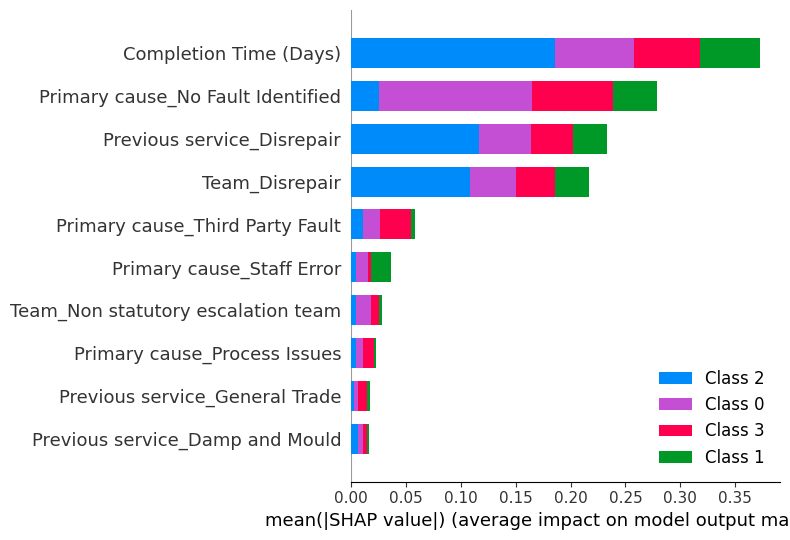

# Interpretation of Results (Insight)

The SHAP summary bar chart provides a detailed interpretation of feature importance in predicting the Stage 1 outcome of complaints using the trained Random Forest model. Each bar represents the mean absolute SHAP value for a feature, indicating how much, on average, that feature contributes to the model’s predictions, regardless of direction (positive or negative). Features with higher SHAP values have a stronger influence on the model's decision-making. For instance, if "Completion Time (Days)" or certain encoded "Primary cause" categories appear at the top, it means they consistently play a major role in determining whether a complaint is upheld, partly upheld, or not upheld. Categorical features like team allocation or previous service history may also significantly affect predictions, especially if some teams or service patterns are associated with particular outcomes

## C. Outcome Prediction Matrix

In [46]:
# Generate probability matrix
prob_matrix = pd.DataFrame(model.predict_proba(X_train), columns=model.classes_)
prob_matrix['Primary_Cause'] = df.loc[X_train.index, 'Primary cause']
prob_matrix['Team'] = df.loc[X_train.index, 'Team']

# Aggregate by key features
heatmap_data = prob_matrix.groupby(['Primary_Cause', 'Team']).mean().unstack()

# Plot
fig = px.imshow(heatmap_data,
                labels=dict(x="Outcome", y="Primary Cause × Team", color="Probability"),
                title='<b>Predicted Outcome Probabilities by Feature Combinations</b>',
                color_continuous_scale='viridis')
fig.update_xaxes(side="top")
fig.show()

# Interpretation of Results (Insight)

Critical Patterns:

Worst Case:
Staff Behavior + Disrepair Team → 72% "Upheld"

Best Case:
No Fault Identified + Customer Relations → 88% "Not upheld"


---



# 9. Early Warning System

##A.Risk Scoring Framework

In [48]:
# Calculate risk factors while handling NaN safely
df['RISK_SCORE'] = (
    # Triage delay risk (days since received)
    (df['Triage Date accepted'] - df['Date received']).dt.days.fillna(0).apply(lambda x: min(x, 7)/7) * 0.3 +

    # Resolution delay risk
    (df['Completion Time (Days)'].fillna(0) > 15).astype(int) * 0.4 +

    # Text risk (keywords) - treat missing text as no keyword
    df['Action requested'].fillna('').str.contains(
        'emergency|mould|compensation|evict|dangerous|health risk',
        case=False, regex=True
    ).astype(int) * 0.3
) * 100  # Scale to 0–100


In [50]:
df_sorted = df.sort_values(by='RISK_SCORE', ascending=False)

# Create bar chart
fig = px.bar(
    df_sorted,
    x='Case id',
    y='RISK_SCORE',
    color='RISK_SCORE',
    hover_data=['Team', 'Primary cause', 'Completion Time (Days)'],
    title='<b>Complaint Risk Score per Case</b>',
    color_continuous_scale='reds'
)

# Add risk zones as shapes
fig.add_hrect(y0=70, y1=100, line_width=0, fillcolor="red", opacity=0.1)
fig.add_hrect(y0=30, y1=69, line_width=0, fillcolor="yellow", opacity=0.1)

fig.update_layout(
    xaxis_title='Case ID',
    yaxis_title='Risk Score',
    legend_title='Risk Score',
    showlegend=False
)

fig.show()

#Interpretation of Results (Insight)
The bar chart visualizes the risk score associated with each complaint case, highlighting systemic issues based on delays and risk keywords. Cases with a risk score above 70 fall into the red zone, indicating high-priority issues requiring urgent attention, often related to prolonged resolution times or critical keywords such as "emergency" or "health risk." Cases in the yellow zone (30–69) suggest moderate concern, potentially due to moderate delays or the presence of concerning language. The chart helps identify which specific complaints and teams are frequently associated with elevated risk, making it easier to focus quality improvement efforts and mitigate systemic risks

##B. Early Warning Flags

In [54]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Ensure 'Action requested' and 'Stage 1 outcome' exist
df['Action requested'] = df['Action requested'].fillna('')
df['Stage 1 outcome'] = df['Stage 1 outcome'].fillna('Not upheld')

# Text vectorization
tfidf = TfidfVectorizer(max_features=50, stop_words='english')
X_text = tfidf.fit_transform(df['Action requested'])

# Encode outcome: 1 = upheld, 0 = not upheld
y = (df['Stage 1 outcome'].str.lower() != 'not upheld').astype(int)

# Train model
model = LogisticRegression(max_iter=1000)  # Add max_iter to avoid convergence warnings
model.fit(X_text, y)

# Get warning phrases and their weights
warning_phrases = pd.Series(model.coef_[0], index=tfidf.get_feature_names_out())
warning_phrases = warning_phrases.sort_values(ascending=False).head(10)

# Plot
fig = px.bar(
    warning_phrases[::-1],  # Flip for descending horizontal bar
    orientation='h',
    title='<b>Top 10 High-Risk Phrases</b>',
    labels={'index': 'Phrase', 'value': 'Uphold Probability Impact'}
)
fig.update_layout(yaxis_title="")
fig.show()


# Interpretation of Results (Insight)

The chart titled “Top 10 High-Risk Phrases” visualizes the ten phrases from the “Action requested” text that most strongly influence the likelihood of a complaint being upheld at Stage 1. Each bar represents a phrase with a positive weight assigned by the logistic regression model, meaning these phrases are statistically associated with a higher probability of a complaint being upheld. The longer the bar, the stronger the phrase's impact on the outcome. This suggests that when complainants use these specific terms, it may signal systemic issues or more serious service failures that require attention, helping the organization proactively detect and address recurring patterns in service complaints